# 1. Introduction

see github report: <br>
https://github.com/micha-1987/Berlin_neighborhood/blob/master/Berlin%20capture%20-%20Report.pdf

# 2. Data acquisition

### List of Berlin neighborhoods

First of all it is necessary to know which neighborhoods are part of Berlin. <br>
Therefore the following wiki page is scraped https://de.wikipedia.org/wiki/Verwaltungsgliederung_Berlins <br>
In the middle of this page is the following table in german language available:
<img src="Berlin neighborhoods.png">

In [2]:
#import all relevant packages

import pandas as pd
import requests
#from bs4 import BeautifulSoup
#from tabulate import tabulate
import time
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 

#!conda install -c conda-forge folium=0.5.0 --yes
import folium
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [4]:
#reading the wiki table of Berlin neighborhoods
res = requests.get("https://de.wikipedia.org/wiki/Verwaltungsgliederung_Berlins")
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[2] 
pd.read_html(str(table))

[     Nr.                   Ortsteil                      Bezirk  Fläche(km²)  \
 0    101                      Mitte                       Mitte         1070   
 1    102                     Moabit                       Mitte          772   
 2    103               Hansaviertel                       Mitte           53   
 3    104                 Tiergarten                       Mitte          517   
 4    105                    Wedding                       Mitte          923   
 5    106              Gesundbrunnen                       Mitte          613   
 6    201             Friedrichshain    Friedrichshain-Kreuzberg          978   
 7    202                  Kreuzberg    Friedrichshain-Kreuzberg         1040   
 8    301            Prenzlauer Berg                      Pankow         1100   
 9    302                  Weißensee                      Pankow          793   
 10   303                Blankenburg                      Pankow          603   
 11   304                Hei

In [5]:
# define the columns of a new dataframe
column_names = ['NH-number','Neighborhood','Borough', 'Area (km²)','Inhabitants','Inhabitants per km²'] 

#get rows of data table
table_rows = table.find_all('tr')

#iterate through the table rows and scrap the data
res = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        res.append(row)

#create data frame including column names and rows
neighborhoods_Berlin = pd.DataFrame(res,columns=column_names)    
neighborhoods_Berlin.head(5)

,NH-number,Neighborhood,Borough,Area (km²),Inhabitants,Inhabitants per km²
0,0101,Mitte,Mitte,"10,70",101.932,9526
1,0102,Moabit,Mitte,"7,72",79.512,10.299
2,0103,Hansaviertel,Mitte,"0,53",5.894,11.121
3,0104,Tiergarten,Mitte,"5,17",14.753,2854
4,0105,Wedding,Mitte,"9,23",86.688,9392


In [23]:
neighborhoods_Berlin.shape

(96, 9)

### Adding geo coordinates to the neighborhoods
The coordinates of the single neighborhoods are necessary for retrieving the foursquare data. <br>
That is why for each neighborhood the geolocator is called and the longitude and latitude is saved.

In [7]:
#Requesting geo coordinates of each neighborhood at geolocator and store it into two arrays
latitude_list = []
latitude_list = np.array(latitude_list)
longitude_list = []
longitude_list = np.array(longitude_list)

for data in neighborhoods_Berlin['Neighborhood']:
    address = 'Berlin, ' + data + ' , Germany'
    geolocator = Nominatim(user_agent="berlin_explorer")
    location = geolocator.geocode(address)
    latitude_list=np.append(latitude_list,values = location.latitude)
    longitude_list=np.append(longitude_list,values = location.longitude)
    print('The geograpical coordinates of {} are {}, {}.'.format(address, location.latitude, location.longitude))
    time.sleep(0.5)

The geograpical coordinates of Berlin, Mitte , Germany are 52.5199818, 13.4041591.
The geograpical coordinates of Berlin, Moabit , Germany are 52.5249451, 13.3696614.
The geograpical coordinates of Berlin, Hansaviertel , Germany are 52.519985, 13.3480704.
The geograpical coordinates of Berlin, Tiergarten , Germany are 52.5202262, 13.3704874.
The geograpical coordinates of Berlin, Wedding , Germany are 52.5427866, 13.3669996.
The geograpical coordinates of Berlin, Gesundbrunnen , Germany are 52.5491748, 13.3900758.
The geograpical coordinates of Berlin, Friedrichshain , Germany are 52.5107448, 13.4351709.
The geograpical coordinates of Berlin, Kreuzberg , Germany are 52.5022467, 13.395148581915826.
The geograpical coordinates of Berlin, Prenzlauer Berg , Germany are 52.549243, 13.4155955.
The geograpical coordinates of Berlin, Weißensee , Germany are 52.558329, 13.439551280343037.
The geograpical coordinates of Berlin, Blankenburg , Germany are 52.5914655, 13.4434822.
The geograpical co

In [8]:
#adding the coordinates to the dataframe by creating two new columns 'Longitude' and 'Latitude'
neighborhoods_Berlin['Latitude'] = latitude_list[:]
neighborhoods_Berlin['Longitude'] = longitude_list[:]
neighborhoods_Berlin.head()

,NH-number,Neighborhood,Borough,Area (km²),Inhabitants,Inhabitants per km²,Latitude,Longitude
0,0101,Mitte,Mitte,"10,70",101.932,9526,52.519982,13.404159
1,0102,Moabit,Mitte,"7,72",79.512,10.299,52.524945,13.369661
2,0103,Hansaviertel,Mitte,"0,53",5.894,11.121,52.519985,13.348070
3,0104,Tiergarten,Mitte,"5,17",14.753,2854,52.520226,13.370487
4,0105,Wedding,Mitte,"9,23",86.688,9392,52.542787,13.367000


### Lets have a look into a map if the coordinates were submitted correctly

In [4]:
# convert Berlin address into latitude and longitude values
address = 'Berlin, Germany'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of {} are {}, {}.'.format(address,latitude, longitude))

The geograpical coordinates of Berlin, Germany are 52.5170365, 13.3888599.


In [5]:
#exploring Berlin by creating a Berlin map including the neighborhoods
map_berlin = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods_Berlin['Latitude'], neighborhoods_Berlin['Longitude'], neighborhoods_Berlin['Borough'], neighborhoods_Berlin['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_berlin)
map_berlin

### Normalizing the area size for calculating individual radius values per neighborhood

In [21]:
#Therefore the area column needs to have a float data type
neighborhoods_Berlin.dtypes

NH-number                int64
Neighborhood            object
Borough                 object
Area (km²)              object
Inhabitants              int64
Inhabitants per km²     object
Latitude               float64
Longitude              float64
dtype: object

In [4]:
#Due to the reason that the neighborhoods have highly different area sizes
#it will be more fair to also have an individual radius for each NH to explore with foursquare
#Normalizing the area size with min/max expression and multiplying everything by the mean area size times 1000 divided by 2
#the final result is the radius in meter (minimum 500m)
neighborhoods_Berlin["Radius"] = ((neighborhoods_Berlin["Area (km²)"] - neighborhoods_Berlin["Area (km²)"].min()) / (neighborhoods_Berlin["Area (km²)"].max()-neighborhoods_Berlin["Area (km²)"].min()) * neighborhoods_Berlin["Area (km²)"].mean() * 1000 / 2).astype(int)
neighborhoods_Berlin.loc[neighborhoods_Berlin['Radius'] == 0, 'Radius'] = (neighborhoods_Berlin["Area (km²)"].min()*1000/2).astype(float)
neighborhoods_Berlin.tail()

,NH-number,Neighborhood,Borough,Area (km²),Inhabitants,Inhabitants per km²,Latitude,Longitude,Radius
91,1207,Waidmannslust,Reinickendorf,2.3,10958,4764,52.606272,13.321194,238.0
92,1208,Lübars,Reinickendorf,5.0,5174,1035,52.612997,13.342222,602.0
93,1209,Wittenau,Reinickendorf,5.9,24306,4120,52.580149,13.316386,723.0
94,1210,Märkisches Viertel,Reinickendorf,3.2,40258,12581,52.598875,13.354212,359.0
95,1211,Borsigwalde,Reinickendorf,2.0,6826,3413,52.579655,13.304926,197.0


### Saving this data set into a csv file

In [76]:
#Saving the dataframe into a csv file to avoid scraping the data again
path = 'Berlin_neighborhood.csv'
neighborhoods_Berlin.to_csv(path, index = False, header = True, encoding = "utf-8")

In [3]:
#read data set
neighborhoods_Berlin = pd.read_csv("Berlin_neighborhood.csv", encoding = "utf-8", delimiter = ";")
neighborhoods_Berlin

,NH-number,Neighborhood,Borough,Area (km²),Inhabitants,Inhabitants per km²,Latitude,Longitude,Radius
0,101,Mitte,Mitte,10.70,101932,9526,52.519982,13.404159,1369
1,102,Moabit,Mitte,7.72,79512,10299,52.524945,13.369661,968
2,103,Hansaviertel,Mitte,0.53,5894,11121,52.519985,13.348070,265
3,104,Tiergarten,Mitte,5.17,14753,2854,52.520226,13.370487,624
4,105,Wedding,Mitte,9.23,86688,9392,52.542787,13.367000,1171
...,...,...,...,...,...,...,...,...,...
91,1207,Waidmannslust,Reinickendorf,2.30,10958,4764,52.606272,13.321194,238
92,1208,Lübars,Reinickendorf,5.00,5174,1035,52.612997,13.342222,602
93,1209,Wittenau,Reinickendorf,5.90,24306,4120,52.580149,13.316386,723
94,1210,Märkisches Viertel,Reinickendorf,3.20,40258,12581,52.598875,13.354212,359


In [5]:
neighborhoods_Berlin.shape

(96, 9)

### Retrieving foursquare data of all neighborhoods
In this section all venues are listed being in a certain range of the neighborhoods center. <br>

In [82]:
#Setting foursquare credentials
CLIENT_ID = 'SWTQ1NMF0WWY2N4WNNUYAFNXQ2FBND3GTG2DNP4G5HT4U3PI' # your Foursquare ID
CLIENT_SECRET = 'UNNZPWCXSF1LQWMNNMEZBWMIVRP5TG0WC552ANYGB32FOSMN' # your Foursquare Secret
VERSION = '20200221'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SWTQ1NMF0WWY2N4WNNUYAFNXQ2FBND3GTG2DNP4G5HT4U3PI
CLIENT_SECRET:UNNZPWCXSF1LQWMNNMEZBWMIVRP5TG0WC552ANYGB32FOSMN


In [83]:
#Function to retrieve venues of each single neighborhood
def getNearbyVenues(names, latitudes, longitudes, radius_all, LIMIT=1000):
    i = 1
    venues_list=[]
    for name, lat, lng, radius in zip(names, latitudes, longitudes, radius_all):
        print(str(i) + ": " + name + " with radius: " + str(radius) + "m")
        i = i + 1    
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        time.sleep(0.5)
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [84]:
#Calling the venues function to finally store all venues into a new dataframe
venues_Berlin = getNearbyVenues(names=neighborhoods_Berlin['Neighborhood'],
                                   latitudes=neighborhoods_Berlin['Latitude'],
                                   longitudes=neighborhoods_Berlin['Longitude'],
                                   radius_all = neighborhoods_Berlin['Radius']
                                  )

1: Mitte with radius: 1369.0m
2: Moabit with radius: 968.0m
3: Hansaviertel with radius: 265.0m
4: Tiergarten with radius: 624.0m
5: Wedding with radius: 1171.0m
6: Gesundbrunnen with radius: 754.0m
7: Friedrichshain with radius: 1245.0m
8: Kreuzberg with radius: 1329.0m
9: Prenzlauer Berg with radius: 1410.0m
10: Weißensee with radius: 996.0m
11: Blankenburg with radius: 740.0m
12: Heinersdorf with radius: 460.0m
13: Karow with radius: 824.0m
14: Stadtrandsiedlung Malchow with radius: 693.0m
15: Pankow with radius: 690.0m
16: Blankenfelde with radius: 1733.0m
17: Buch with radius: 2379.0m
18: Französisch Buchholz with radius: 1544.0m
19: Niederschönhausen with radius: 802.0m
20: Rosenthal with radius: 588.0m
21: Wilhelmsruh with radius: 113.0m
22: Charlottenburg with radius: 1356.0m
23: Wilmersdorf with radius: 892.0m
24: Schmargendorf with radius: 412.0m
25: Grunewald with radius: 2931.0m
26: Westend with radius: 1746.0m
27: Charlottenburg-Nord with radius: 763.0m
28: Halensee with r

### Saving this data set into another csv file

In [89]:
#Saving the dataframe into a csv file to avoid scraping the data again
path = 'Berlin_venues.csv'
venues_Berlin.to_csv(path, index = False, header = True, encoding='utf-8')

In [7]:
venues_Berlin = pd.read_csv("Berlin_venues.csv", encoding = "utf-8")
venues_Berlin

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mitte,52.519982,13.404159,Buchhandlung Walther König,52.521301,13.400758,Bookstore
1,Mitte,52.519982,13.404159,Kuppelumgang Berliner Dom,52.518966,13.400981,Scenic Lookout
2,Mitte,52.519982,13.404159,Radisson Blu,52.519561,13.402857,Hotel
3,Mitte,52.519982,13.404159,Fat Tire Bike Tours,52.521233,13.409110,Bike Rental / Bike Share
4,Mitte,52.519982,13.404159,Lustgarten,52.518469,13.399454,Garden
...,...,...,...,...,...,...,...
3066,Märkisches Viertel,52.598875,13.354212,Flamingo Ballpark,52.599845,13.349865,Baseball Field
3067,Märkisches Viertel,52.598875,13.354212,Post | Postbank,52.596635,13.350577,Post Office
3068,Borsigwalde,52.579655,13.304926,POLO Motorrad Store,52.580640,13.303932,Motorcycle Shop
3069,Borsigwalde,52.579655,13.304926,Aventuras,52.580728,13.302711,Mexican Restaurant


In [4]:
#The size of the resulting dataframe
print(venues_Berlin.shape)
venues_Berlin.head()

(3071, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mitte,52.519982,13.404159,Buchhandlung Walther König,52.521301,13.400758,Bookstore
1,Mitte,52.519982,13.404159,Kuppelumgang Berliner Dom,52.518966,13.400981,Scenic Lookout
2,Mitte,52.519982,13.404159,Radisson Blu,52.519561,13.402857,Hotel
3,Mitte,52.519982,13.404159,Fat Tire Bike Tours,52.521233,13.409110,Bike Rental / Bike Share
4,Mitte,52.519982,13.404159,Lustgarten,52.518469,13.399454,Garden


# 3. Data exploration and analysis

### Number of venues clustered in bins

In [8]:
#Number of returned venues per neighborhood (100 at max)
#creating a new dataframe to store the count values
venues_count = venues_Berlin["Venue"].groupby(venues_Berlin['Neighborhood']).count().reset_index(name="Venue_count")
venues_count

,Neighborhood,Venue_count
0,Adlershof,19
1,Alt-Hohenschönhausen,34
2,Alt-Treptow,9
3,Altglienicke,15
4,Baumschulenweg,23
...,...,...
90,Wilhelmsruh,3
91,Wilhelmstadt,68
92,Wilmersdorf,67
93,Wittenau,13


In [9]:
#Adding the count values to the Berlin neighborhood dataset 
# Neighborhoods which dont have a venue a statistical significants
# So NaN is filled with 0
neighborhoods_count_Berlin = neighborhoods_Berlin.join(venues_count.set_index('Neighborhood'), on='Neighborhood')
neighborhoods_count_Berlin['Venue_count'].fillna(0, inplace=True)
neighborhoods_count_Berlin

,NH-number,Neighborhood,Borough,Area (km²),Inhabitants,Inhabitants per km²,Latitude,Longitude,Radius,Venue_count
0,101,Mitte,Mitte,10.70,101932,9526,52.519982,13.404159,1369,100.0
1,102,Moabit,Mitte,7.72,79512,10299,52.524945,13.369661,968,100.0
2,103,Hansaviertel,Mitte,0.53,5894,11121,52.519985,13.348070,265,11.0
3,104,Tiergarten,Mitte,5.17,14753,2854,52.520226,13.370487,624,61.0
4,105,Wedding,Mitte,9.23,86688,9392,52.542787,13.367000,1171,100.0
...,...,...,...,...,...,...,...,...,...,...
91,1207,Waidmannslust,Reinickendorf,2.30,10958,4764,52.606272,13.321194,238,5.0
92,1208,Lübars,Reinickendorf,5.00,5174,1035,52.612997,13.342222,602,4.0
93,1209,Wittenau,Reinickendorf,5.90,24306,4120,52.580149,13.316386,723,13.0
94,1210,Märkisches Viertel,Reinickendorf,3.20,40258,12581,52.598875,13.354212,359,17.0


(array([26., 25., 11.,  7.,  3.,  4.,  5.,  2.,  0., 13.]), array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]), <a list of 10 Patch objects>)


<function matplotlib.pyplot.show(*args, **kw)>

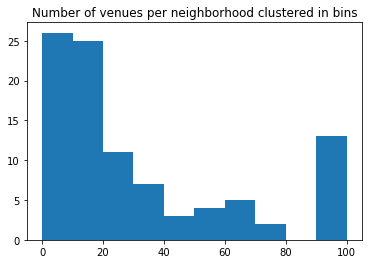

In [10]:
#Number of venues per neighborhood clustered in bins
data_hist = neighborhoods_count_Berlin['Venue_count']
plt.hist(data_hist, histtype='bar', color = 'blue')
print(plt.hist(data_hist))
plt.title("Number of venues per neighborhood clustered in bins")
plt.show

### Number of neighborhood venues per borough

<function matplotlib.pyplot.show(*args, **kw)>

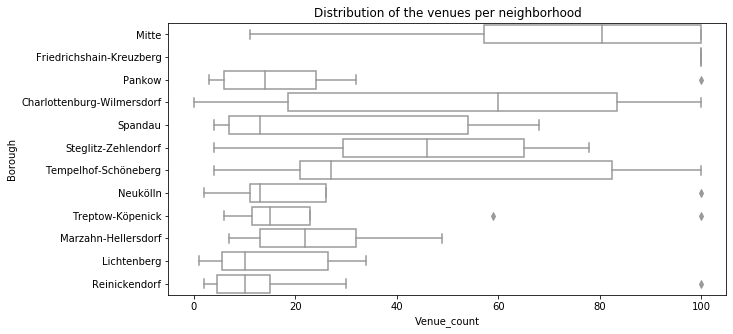

In [11]:
#Illustrating the distribution of the venues per neighborhood grouped by the related borough (Boxplot)
plt.figure(figsize=(10,5))
sns.boxplot(data=neighborhoods_count_Berlin, x='Venue_count', y='Borough', color='white')
plt.title("Distribution of the venues per neighborhood")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

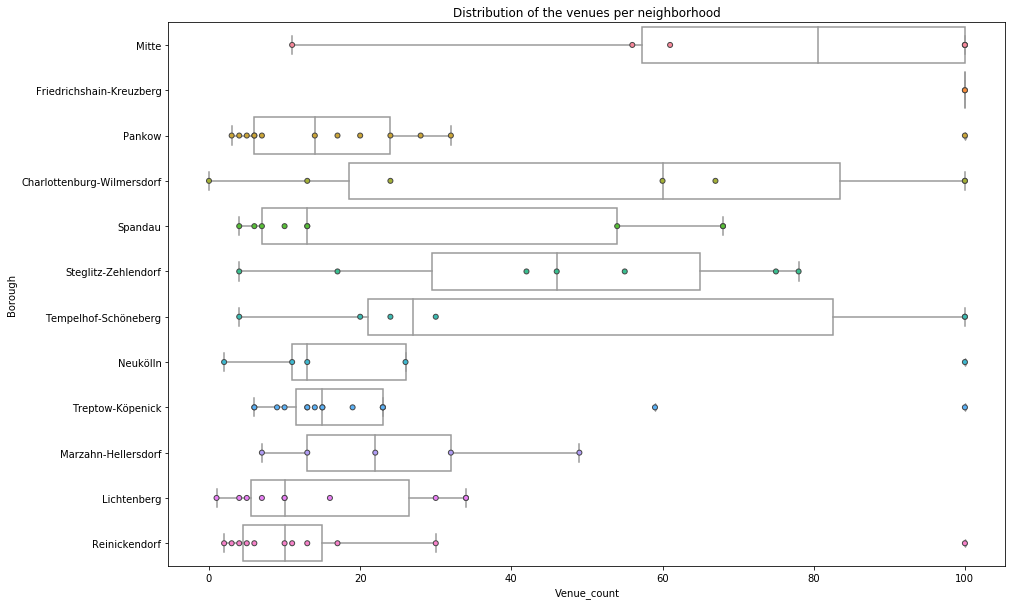

In [12]:
#Illustrating the distribution of the venues per neighborhood grouped by the related borough (Catplot)
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=neighborhoods_count_Berlin, x='Venue_count', y='Borough', color='white')
ax = sns.stripplot( data=neighborhoods_count_Berlin, x='Venue_count', y='Borough', jitter = False, linewidth=1)
plt.title("Distribution of the venues per neighborhood")
plt.show

### Ratio of neighborhoods
Calulcating the portion of neighborhoods per borough having less than 20 venues

In [33]:
# Get neighborhood columns and filter on Venue_count value <= 20
less_20_venues = pd.DataFrame({'Borough':neighborhoods_count_Berlin['Borough'].values, 'Venue_count':neighborhoods_count_Berlin['Venue_count'], 'Neighborhood':neighborhoods_count_Berlin['Neighborhood'].values})
indexNames = less_20_venues[less_20_venues['Venue_count'] >= 20 ].index
less_20_venues = less_20_venues.drop(indexNames)
less_20_venues.dropna(inplace = True)
#Count the number occurances per borough and sort it descending
less_20_venues_borough_count = pd.DataFrame(less_20_venues.groupby(['Borough'],as_index=False).count().sort_values(["Venue_count"],ascending = False))
less_20_venues_borough_count.drop(columns='Neighborhood', axis=1, inplace=True)
less_20_venues_borough_count.rename(columns={'Venue_count':'Num_of_less_20_venues'}, inplace=True)
less_20_venues_borough_count

,Borough,Num_of_less_20_venues
10,Treptow-Köpenick,10
6,Reinickendorf,9
5,Pankow,8
1,Lichtenberg,7
7,Spandau,6
4,Neukölln,3
0,Charlottenburg-Wilmersdorf,2
2,Marzahn-Hellersdorf,2
8,Steglitz-Zehlendorf,2
3,Mitte,1


In [28]:
#Total number of neighborhoods per borough
tot_num_of_neighborhoods = pd.DataFrame(neighborhoods_count_Berlin.groupby(['Borough'], as_index=False).count().sort_values(["Venue_count"],ascending = False))
tot_num_of_neighborhoods.drop(tot_num_of_neighborhoods.columns[1:9], axis=1, inplace=True)
tot_num_of_neighborhoods.rename(columns={'Venue_count':'Num_of_neighborhoods'}, inplace=True)
tot_num_of_neighborhoods

,Borough,Num_of_neighborhoods
11,Treptow-Köpenick,15
6,Pankow,13
7,Reinickendorf,11
2,Lichtenberg,10
8,Spandau,9
0,Charlottenburg-Wilmersdorf,7
9,Steglitz-Zehlendorf,7
4,Mitte,6
10,Tempelhof-Schöneberg,6
3,Marzahn-Hellersdorf,5


In [34]:
#Calculating the ratio of total neighborhoods divided by the number of neighborhoods having <20 venues
Ratio_boroughs = tot_num_of_neighborhoods.join(less_20_venues_borough_count.set_index('Borough'), on='Borough')
Ratio_boroughs['Ratio: tot NH / <20 NH'] = Ratio_boroughs['Num_of_less_20_venues'] / Ratio_boroughs['Num_of_neighborhoods']
Ratio_boroughs.sort_values(['Ratio: tot NH / <20 NH'], ascending=False, inplace=True)
Ratio_boroughs

,Borough,Num_of_neighborhoods,Num_of_less_20_venues,Ratio: tot NH / <20 NH
7,Reinickendorf,11,9.0,0.818182
2,Lichtenberg,10,7.0,0.700000
11,Treptow-Köpenick,15,10.0,0.666667
8,Spandau,9,6.0,0.666667
6,Pankow,13,8.0,0.615385
5,Neukölln,5,3.0,0.600000
3,Marzahn-Hellersdorf,5,2.0,0.400000
0,Charlottenburg-Wilmersdorf,7,2.0,0.285714
9,Steglitz-Zehlendorf,7,2.0,0.285714
4,Mitte,6,1.0,0.166667


### Remember the area size
The calculated ratio in the previous section is now put into a relation with the total area size of each bororugh

In [13]:
#Total area size per borough
tot_area_size_neighborhoods = pd.DataFrame(neighborhoods_Berlin.groupby(['Borough'], as_index=False).sum().sort_values(["Area (km²)"],ascending = False))
tot_area_size_neighborhoods

,Borough,NH-number,Area (km²),Inhabitants,Latitude,Longitude,Radius
11,Treptow-Köpenick,13620,165.70,247213,786.610473,203.368006,21237
6,Pankow,3991,103.26,405578,683.519487,174.409869,12972
9,Steglitz-Zehlendorf,4228,102.47,299454,367.018009,92.769537,13298
8,Spandau,4545,91.90,243977,472.741598,118.665927,11730
7,Reinickendorf,13266,89.40,265220,578.565572,146.235740,11250
0,Charlottenburg-Wilmersdorf,2828,64.62,240515,367.498134,93.067460,8199
3,Marzahn-Hellersdorf,5015,61.71,268548,262.562536,67.906877,7951
10,Tempelhof-Schöneberg,4221,53.08,193757,314.664702,80.172371,6716
2,Lichtenberg,11065,52.02,261131,524.934180,136.117211,6288
5,Neukölln,4015,44.91,257610,262.131321,67.230257,5688


In [14]:
#Merging the datsets to unite the necessary parameters into one dataframe
Ratio_boroughs = Ratio_boroughs[["Borough","Num_of_neighborhoods", "Num_of_less_20_venues", "Ratio: tot NH / <20 NH"]].merge(tot_area_size_neighborhoods[["Area (km²)","Borough"]], on = 'Borough',how = 'left')
Ratio_boroughs

,Borough,Num_of_neighborhoods,Num_of_less_20_venues,Ratio: tot NH / <20 NH,Area (km²)
0,Reinickendorf,11,9.0,0.818182,89.40
1,Lichtenberg,10,7.0,0.700000,52.02
2,Treptow-Köpenick,15,10.0,0.666667,165.70
3,Spandau,9,6.0,0.666667,91.90
4,Pankow,13,8.0,0.615385,103.26
5,Neukölln,5,3.0,0.600000,44.91
6,Marzahn-Hellersdorf,5,2.0,0.400000,61.71
7,Charlottenburg-Wilmersdorf,7,2.0,0.285714,64.62
8,Steglitz-Zehlendorf,7,2.0,0.285714,102.47
9,Mitte,6,1.0,0.166667,39.48


In [15]:
#Calculating a judging parameter by including the area size and ratio of <20venues neichborhoods
Ratio_boroughs['Ratio * <20 NH'] = Ratio_boroughs['Ratio: tot NH / <20 NH'] * Ratio_boroughs['Num_of_less_20_venues']
Ratio_boroughs.sort_values(['Ratio * <20 NH'], ascending=False, inplace=True)
Ratio_boroughs

,Borough,Num_of_neighborhoods,Num_of_less_20_venues,Ratio: tot NH / <20 NH,Area (km²),Ratio * <20 NH
0,Reinickendorf,11,9.0,0.818182,89.40,7.363636
2,Treptow-Köpenick,15,10.0,0.666667,165.70,6.666667
4,Pankow,13,8.0,0.615385,103.26,4.923077
1,Lichtenberg,10,7.0,0.700000,52.02,4.900000
3,Spandau,9,6.0,0.666667,91.90,4.000000
5,Neukölln,5,3.0,0.600000,44.91,1.800000
6,Marzahn-Hellersdorf,5,2.0,0.400000,61.71,0.800000
7,Charlottenburg-Wilmersdorf,7,2.0,0.285714,64.62,0.571429
8,Steglitz-Zehlendorf,7,2.0,0.285714,102.47,0.571429
9,Mitte,6,1.0,0.166667,39.48,0.166667


### Number of venues vs radius - Scatter plot

<Figure size 720x720 with 0 Axes>

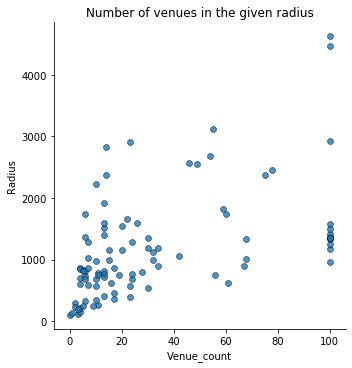

In [16]:
#Scatter plot: number of venues vs radius
scatter_kws={'linewidths':0.5,'edgecolor':'k'}
plt.figure(figsize=(10,10))
sns.lmplot( x ="Venue_count", y="Radius", data=neighborhoods_count_Berlin, fit_reg=False, legend=True, scatter_kws=scatter_kws)
plt.title('Number of venues in the given radius')

plt.show()

### Number of venues vs radius - Scatter plot
Coloring the scatter points to their corresponding borough

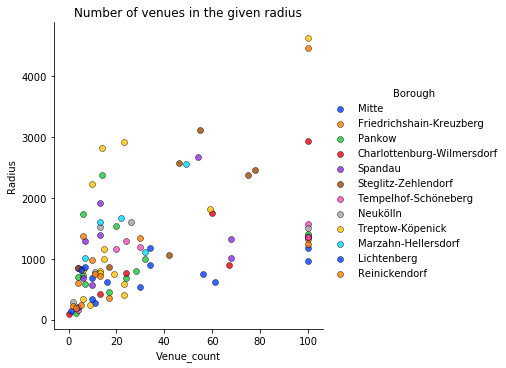

In [17]:
#Scatter plot: number of venues vs radius -> clustered by borough
sns.lmplot( x="Venue_count", y="Radius", data=neighborhoods_count_Berlin, fit_reg=False, hue='Borough', legend=True, palette='bright', scatter_kws=scatter_kws)
plt.title('Number of venues in the given radius')
plt.show()

### Check the diversity of the neighborhoods

In [18]:
#Number of overall unique venue categories
print('There are {} uniques categories.'.format(len(venues_Berlin['Venue Category'].unique())))

There are 328 uniques categories.


In [19]:
#Count the number of unique venue categories per neighborhood to see the diversity of the neighborhood
venues_category_distinct = venues_Berlin.groupby('Neighborhood')['Venue Category'].nunique().reset_index(name="Distinct_Venue_categories")
venues_category_distinct.head()

,Neighborhood,Distinct_Venue_categories
0,Adlershof,16
1,Alt-Hohenschönhausen,21
2,Alt-Treptow,7
3,Altglienicke,11
4,Baumschulenweg,16


In [20]:
#Creating a dataset having the numbers of venues and number of venue categories per neighborhood
category_distinct_count = neighborhoods_Berlin.join(venues_category_distinct.set_index('Neighborhood'), on='Neighborhood')
category_distinct_count = category_distinct_count.join(venues_count.set_index('Neighborhood'), on='Neighborhood')
category_distinct_count.head()

,NH-number,Neighborhood,Borough,Area (km²),Inhabitants,Inhabitants per km²,Latitude,Longitude,Radius,Distinct_Venue_categories,Venue_count
0,101,Mitte,Mitte,10.70,101932,9526,52.519982,13.404159,1369,62.0,100.0
1,102,Moabit,Mitte,7.72,79512,10299,52.524945,13.369661,968,61.0,100.0
2,103,Hansaviertel,Mitte,0.53,5894,11121,52.519985,13.348070,265,9.0,11.0
3,104,Tiergarten,Mitte,5.17,14753,2854,52.520226,13.370487,624,46.0,61.0
4,105,Wedding,Mitte,9.23,86688,9392,52.542787,13.367000,1171,60.0,100.0


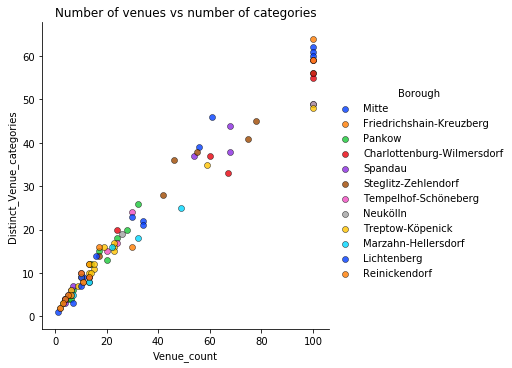

In [21]:
#Scatter plot: number of venues vs number of categories
sns.lmplot( x="Venue_count", y="Distinct_Venue_categories", data=category_distinct_count, fit_reg=False, hue='Borough', legend=True, palette='bright', scatter_kws=scatter_kws) 
plt.title('Number of venues vs number of categories')
plt.show()

# 4. Clustering models

### Data preparation
The venue categories belonging to the neighborhoods are one hot encoded and mean calculated.
Additonially the inhabitants per km² is added to the dataset and put into the kmeans clustering method.

In [22]:
#Lets get the number of venues per category for each neighborhood
venues_category_count = venues_Berlin.groupby(['Neighborhood','Venue Category']).size().reset_index(name="Venue_category_count")
venues_category_count.head()

,Neighborhood,Venue Category,Venue_category_count
0,Adlershof,Bank,1
1,Adlershof,Café,1
2,Adlershof,Food Truck,1
3,Adlershof,Furniture / Home Store,1
4,Adlershof,Greek Restaurant,2


In [13]:
#Adding the number of inhabitants per km² as a required parameter for the upcoming analysis
venues_Berlin_one_hot_prep = venues_Berlin[["Neighborhood","Venue Category"]].merge(neighborhoods_Berlin[["Neighborhood","Inhabitants per km²"]], on = 'Neighborhood',how = 'left')
venues_Berlin_one_hot_prep

,Neighborhood,Venue Category,Inhabitants per km²
0,Mitte,Bookstore,9526
1,Mitte,Scenic Lookout,9526
2,Mitte,Hotel,9526
3,Mitte,Bike Rental / Bike Share,9526
4,Mitte,Garden,9526
...,...,...,...
3066,Märkisches Viertel,Baseball Field,12581
3067,Märkisches Viertel,Post Office,12581
3068,Borsigwalde,Motorcycle Shop,3413
3069,Borsigwalde,Mexican Restaurant,3413


In [24]:
venues_Berlin_one_hot_prep.shape

(3071, 3)

In [14]:
venues_Berlin_one_hot_prep

,Neighborhood,Venue Category,Inhabitants per km²
0,Mitte,Bookstore,9526
1,Mitte,Scenic Lookout,9526
2,Mitte,Hotel,9526
3,Mitte,Bike Rental / Bike Share,9526
4,Mitte,Garden,9526
...,...,...,...
3066,Märkisches Viertel,Baseball Field,12581
3067,Märkisches Viertel,Post Office,12581
3068,Borsigwalde,Motorcycle Shop,3413
3069,Borsigwalde,Mexican Restaurant,3413


In [15]:
# one hot encoding
venues_Berlin_one_hot = pd.get_dummies(venues_Berlin_one_hot_prep[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
venues_Berlin_one_hot.drop(labels=['Neighborhood'], axis=1,inplace = True)
venues_Berlin_one_hot.insert(0, 'Inhabitants per km²', venues_Berlin_one_hot_prep['Inhabitants per km²'])
venues_Berlin_one_hot["Inhabitants per km²"] = venues_Berlin_one_hot.iloc[:,0].str.replace(',','.').astype(float)

venues_Berlin_one_hot.insert(0, 'Neighborhood', venues_Berlin_one_hot_prep['Neighborhood'])

venues_Berlin_one_hot

,Neighborhood,Inhabitants per km²,ATM,Adult Boutique,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Warehouse Store,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Mitte,9526.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Mitte,9526.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Mitte,9526.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Mitte,9526.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Mitte,9526.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066,Märkisches Viertel,12581.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3067,Märkisches Viertel,12581.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3068,Borsigwalde,3413.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3069,Borsigwalde,3413.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
venues_Berlin_one_hot.shape

(3071, 329)

In [16]:
Berlin_grouped = venues_Berlin_one_hot.groupby('Neighborhood').mean().reset_index()
Berlin_grouped

,Neighborhood,Inhabitants per km²,ATM,Adult Boutique,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Warehouse Store,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Adlershof,3205.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,Alt-Hohenschönhausen,5223.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,Alt-Treptow,5470.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
3,Altglienicke,3656.0,0.000000,0.0,0.0,0.0,0.0,0.133333,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4,Baumschulenweg,3908.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Wilhelmsruh,5778.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.333333,0.0,0.0
91,Wilhelmstadt,3886.0,0.014706,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
92,Wilmersdorf,14279.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.014925,0.0,0.0,0.0,0.000000,0.0,0.0
93,Wittenau,4120.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


In [29]:
Berlin_grouped.shape

(95, 329)

### Clustering reults
The means clustering will sort the data set into 4 clusters.
These clusters will illustrated in the map.

In [17]:
# set number of clusters
kclusters = 4

Berlin_grouped_clustering = Berlin_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Berlin_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 3, 2, 0, 0, 2, 1, 0, 1, 3,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 3, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 1,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 3, 3, 3, 0, 3, 1, 2, 2, 0, 2, 3,
       2, 1, 0, 3, 0, 2, 2, 2, 0, 3, 0, 2, 2, 0, 3, 0, 2, 0, 2, 0, 0, 3,
       2, 2, 2, 2, 1, 2, 2], dtype=int32)

In [18]:
# add clustering labels
Berlin_clustered = pd.DataFrame({'Neighborhood':Berlin_grouped['Neighborhood'].values})
Berlin_clustered.insert(1, 'Cluster_Labels', kmeans.labels_)

neighborhoods_Berlin = neighborhoods_Berlin.join(Berlin_clustered.set_index('Neighborhood'), on='Neighborhood')
neighborhoods_Berlin['Cluster_Labels'].value_counts()

2.0    38
0.0    36
3.0    12
1.0     9
Name: Cluster_Labels, dtype: int64

In [19]:
#Check neighborhoods dont have any venues listed
check = neighborhoods_Berlin[neighborhoods_Berlin.isna().any(axis=1)]
print(check)

    NH-number Neighborhood                     Borough  Area (km²)  \
27        407     Halensee  Charlottenburg-Wilmersdorf        1.27   

    Inhabitants Inhabitants per km²   Latitude  Longitude  Radius  \
27        15556               12249  52.492659  13.282142      99   

    Cluster_Labels  
27             NaN  


In [20]:
#drop na clusters
neighborhoods_Berlin.dropna(inplace=True)

Displaying the four clusters within the Belin map

In [21]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.gnuplot(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, borough in zip(neighborhoods_Berlin['Latitude'], neighborhoods_Berlin['Longitude'], neighborhoods_Berlin['Neighborhood'], neighborhoods_Berlin['Cluster_Labels'], neighborhoods_Berlin['Borough']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + ' ' + borough, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        line_color='#3186cc',
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

### Cluster analysis
Cluster 2 and 0 will be focused on as "support required" clusters.
Then the ratio of neighborhoods being in those clusters will calculated in comparison to the total number of neighborhoods.

In [37]:
#count the clusters per neighborhood
neighborhoods_Berlin.groupby(['Borough','Cluster_Labels']).count()#.sort_values(["Cluster Labels"],ascending = False)

NH-number  Neighborhood  \
Borough                    Cluster_Labels                            
Charlottenburg-Wilmersdorf 0.0                     1             1   
                           1.0                     1             1   
                           2.0                     3             3   
                           3.0                     1             1   
Friedrichshain-Kreuzberg   1.0                     2             2   
Lichtenberg                0.0                     3             3   
                           1.0                     1             1   
                           2.0                     4             4   
                           3.0                     2             2   
Marzahn-Hellersdorf        0.0                     4             4   
                           2.0                     1             1   
Mitte                      0.0                     1             1   
                           1.0                     1             1   
                           3.0                     4             4   
Neukölln                   1.0                     2             2   
                           2.0                     3             3   
Pankow                     0.0                     7             7   
                           1.0                     1             1   
                           2.0                     4             4   
                           3.0                     1             1   
Reinickendorf              0.0                     6             6   
                           2.0                     3             3   
                           3.0                     2             2   
Spandau                    0.0                     4             4   
                           2.0                     5             5   
Steglitz-Zehlendorf        0.0                     3             3   
                           2.0                     3             3   
                           3.0                     1             1   
Tempelhof-Schöneberg       1.0                     1             1   
                           2.0                     4             4   
                           3.0                     1             1   
Treptow-Köpenick           0.0                     7             7   
                           2.0                     8             8   

                                           Area (km²)  Inhabitants  \
Borough                    Cluster_Labels                            
Charlottenburg-Wilmersdorf 0.0                      1            1   
                           1.0                      1            1   
                           2.0                      3            3   
                           3.0                      1            1   
Friedrichshain-Kreuzberg   1.0                      2            2   
Lichtenberg                0.0                      3            3   
                           1.0                      1            1   
                           2.0                      4            4   
                           3.0                      2            2   
Marzahn-Hellersdorf        0.0                      4            4   
                           2.0                      1            1   
Mitte                      0.0                      1            1   
                           1.0                      1            1   
                           3.0                      4            4   
Neukölln                   1.0                      2            2   
                           2.0                      3            3   
Pankow                     0.0                      7            7   
                           1.0                      1            1   
                           2.0                      4            4   
                           3.0                      1            1   
Reinickendorf              0.0                      

In [22]:
#reduce to only cluster 0 and 2
neighborhoods_Berlin_undev02 = neighborhoods_Berlin
neighborhoods_Berlin_undev02 = neighborhoods_Berlin_undev02[neighborhoods_Berlin_undev02.Cluster_Labels != 1]
neighborhoods_Berlin_undev02 = neighborhoods_Berlin_undev02[neighborhoods_Berlin_undev02.Cluster_Labels != 3]
neighborhoods_Berlin_undev02.head()

,NH-number,Neighborhood,Borough,Area (km²),Inhabitants,Inhabitants per km²,Latitude,Longitude,Radius,Cluster_Labels
3,104,Tiergarten,Mitte,5.17,14753,2854,52.520226,13.370487,624,0.0
9,302,Weißensee,Pankow,7.93,53737,6776,52.558329,13.439551,996,2.0
10,303,Blankenburg,Pankow,6.03,6865,1138,52.591465,13.443482,740,0.0
11,304,Heinersdorf,Pankow,3.95,7621,1929,52.429860,13.329170,460,0.0
12,305,Karow,Pankow,6.65,19615,2950,52.615215,13.469465,824,2.0


In [24]:
#count 0 and 2nd cluster per borough
neighborhoods_Berlin_undev02.groupby(['Borough','Cluster_Labels']).count()

NH-number  Neighborhood  \
Borough                    Cluster_Labels                            
Charlottenburg-Wilmersdorf 0.0                     1             1   
                           2.0                     3             3   
Lichtenberg                0.0                     3             3   
                           2.0                     4             4   
Marzahn-Hellersdorf        0.0                     4             4   
                           2.0                     1             1   
Mitte                      0.0                     1             1   
Neukölln                   2.0                     3             3   
Pankow                     0.0                     7             7   
                           2.0                     4             4   
Reinickendorf              0.0                     6             6   
                           2.0                     3             3   
Spandau                    0.0                     4             4   
                           2.0                     5             5   
Steglitz-Zehlendorf        0.0                     3             3   
                           2.0                     3             3   
Tempelhof-Schöneberg       2.0                     4             4   
Treptow-Köpenick           0.0                     7             7   
                           2.0                     8             8   

                                           Area (km²)  Inhabitants  \
Borough                    Cluster_Labels                            
Charlottenburg-Wilmersdorf 0.0                      1            1   
                           2.0                      3            3   
Lichtenberg                0.0                      3            3   
                           2.0                      4            4   
Marzahn-Hellersdorf        0.0                      4            4   
                           2.0                      1            1   
Mitte                      0.0                      1            1   
Neukölln                   2.0                      3            3   
Pankow                     0.0                      7            7   
                           2.0                      4            4   
Reinickendorf              0.0                      6            6   
                           2.0                      3            3   
Spandau                    0.0                      4            4   
                           2.0                      5            5   
Steglitz-Zehlendorf        0.0                      3            3   
                           2.0                      3            3   
Tempelhof-Schöneberg       2.0                      4            4   
Treptow-Köpenick           0.0                      7            7   
                           2.0                      8            8   

                                           Inhabitants per km²  Latitude  \
Borough                    Cluster_Labels                                  
Charlottenburg-Wilmersdorf 0.0                               1         1   
                           2.0                               3         3   
Lichtenberg                0.0                               3         3   
                           2.0                               4         4   
Marzahn-Hellersdorf        0.0                               4         4   
                           2.0                               1         1   
Mitte                      0.0                               1         1   
Neukölln                   2.0                               3         3   
Pankow                     0.0                               7         7   
                           2.0                               4         4   
Reinickendorf              0.0                               6         6   
                           2.0                               3         3   
Spandau                    0.0       

In [26]:
#Creating a new dataset with a merge to get the relevant columns for continuing 
neighborhoods_Berlin_undev02_new = neighborhoods_Berlin_undev02[["Neighborhood","Radius", "Cluster_Labels"]].merge(neighborhoods_count_Berlin[["Neighborhood","Venue_count","Borough"]], on = 'Neighborhood',how = 'left')
neighborhoods_Berlin_undev02_new

,Neighborhood,Radius,Cluster_Labels,Venue_count,Borough
0,Tiergarten,624,0.0,61.0,Mitte
1,Weißensee,996,2.0,32.0,Pankow
2,Blankenburg,740,0.0,6.0,Pankow
3,Heinersdorf,460,0.0,17.0,Pankow
4,Karow,824,2.0,5.0,Pankow
...,...,...,...,...,...
69,Hermsdorf,750,0.0,11.0,Reinickendorf
70,Waidmannslust,238,2.0,5.0,Reinickendorf
71,Lübars,602,0.0,4.0,Reinickendorf
72,Wittenau,723,2.0,13.0,Reinickendorf


Here the actual ratio is calculated

In [29]:
#Check the number of neighborhoods of cluster 0 and 2 per borough and calculate the ration
venues_cluster_count = neighborhoods_Berlin_undev02_new.groupby(['Borough','Cluster_Labels']).size().reset_index(name="Cluster_Labels_Count")
venues_cluster_count = venues_cluster_count.groupby(['Borough']).sum().sort_values(["Cluster_Labels_Count"], ascending=False).reset_index()
venues_cluster_count = venues_cluster_count[["Borough","Cluster_Labels_Count"]].merge(tot_num_of_neighborhoods[["Num_of_neighborhoods","Borough"]], on = 'Borough',how = 'left')
venues_cluster_count['Ratio'] = venues_cluster_count['Cluster_Labels_Count'] / venues_cluster_count['Num_of_neighborhoods']
venues_cluster_count = venues_cluster_count.sort_values(['Ratio'], ascending=False)
venues_cluster_count

,Borough,Cluster_Labels_Count,Num_of_neighborhoods,Ratio
0,Treptow-Köpenick,15,15,1.000000
3,Spandau,9,9,1.000000
6,Marzahn-Hellersdorf,5,5,1.000000
5,Steglitz-Zehlendorf,6,7,0.857143
1,Pankow,11,13,0.846154
2,Reinickendorf,9,11,0.818182
4,Lichtenberg,7,10,0.700000
8,Tempelhof-Schöneberg,4,6,0.666667
9,Neukölln,3,5,0.600000
7,Charlottenburg-Wilmersdorf,4,7,0.571429


### Geografic judgement

In [37]:
#Prepare dataset to illustrate the colored neighborhoods per borough within the map

Ratio_boroughs_new = Ratio_boroughs
neighborhoods_Berlin_reindexed = neighborhoods_Berlin
#neighborhoods_Berlin_reindexed.drop(['Area (km²)'], axis=1, inplace=True)
#Ratio_boroughs_new.drop(['Area (km²)'], axis=1, inplace=True)
Ratio_boroughs_new.reset_index(inplace=True)
neighborhoods_Berlin_reindexed = neighborhoods_Berlin_reindexed.join(Ratio_boroughs_new.set_index('Borough'), on='Borough')
neighborhoods_Berlin_reindexed

,NH-number,Neighborhood,Borough,Inhabitants,Inhabitants per km²,Latitude,Longitude,Radius,Cluster_Labels,index,Num_of_neighborhoods,Num_of_less_20_venues,Ratio: tot NH / <20 NH
0,101,Mitte,Mitte,101932,9526,52.519982,13.404159,1369,3.0,4,6,1.0,0.166667
1,102,Moabit,Mitte,79512,10299,52.524945,13.369661,968,3.0,4,6,1.0,0.166667
2,103,Hansaviertel,Mitte,5894,11121,52.519985,13.348070,265,3.0,4,6,1.0,0.166667
3,104,Tiergarten,Mitte,14753,2854,52.520226,13.370487,624,0.0,4,6,1.0,0.166667
4,105,Wedding,Mitte,86688,9392,52.542787,13.367000,1171,3.0,4,6,1.0,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,1207,Waidmannslust,Reinickendorf,10958,4764,52.606272,13.321194,238,2.0,7,11,9.0,0.818182
92,1208,Lübars,Reinickendorf,5174,1035,52.612997,13.342222,602,0.0,7,11,9.0,0.818182
93,1209,Wittenau,Reinickendorf,24306,4120,52.580149,13.316386,723,2.0,7,11,9.0,0.818182
94,1210,Märkisches Viertel,Reinickendorf,40258,12581,52.598875,13.354212,359,3.0,7,11,9.0,0.818182


### Map of Berlin with colored neighborhoods belonging to their boroughs

In [38]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
# number of neighborhoods
kclusters = 12
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i)**x for i in range(kclusters)]
colors_array = cm.nipy_spectral(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
lgd_txt = '<span style="color: {col};">{txt}</span>'

# add markers to the map
markers_colors = []
for lat, lon, poi, index_borough, borough in zip(neighborhoods_Berlin_reindexed['Latitude'], neighborhoods_Berlin_reindexed['Longitude'], neighborhoods_Berlin_reindexed['Neighborhood'], neighborhoods_Berlin_reindexed['index'], neighborhoods_Berlin_reindexed['Borough']):
    label = folium.Popup(str(poi) + ' index ' + str(index_borough) + ' Borough:' + borough, parse_html=True)
    #color=rainbow[int(index_borough)],
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        line_color='#3186cc',
        popup=label,
        color=rainbow[int(index_borough)],
        fill=True,
        fill_color=rainbow[int(index_borough)],
        fill_opacity=0.5,
        line_opacity = 0.1).add_to(map_clusters)
    #fg = folium.FeatureGroup(name= lgd_txt.format(txt= color + 'borough', col= color))
map_clusters

In [40]:
neighborhoods_Berlin_reindexed02 = neighborhoods_Berlin_reindexed
neighborhoods_Berlin_reindexed02 = neighborhoods_Berlin_reindexed02[neighborhoods_Berlin_reindexed02.Cluster_Labels != 1]
neighborhoods_Berlin_reindexed02 = neighborhoods_Berlin_reindexed02[neighborhoods_Berlin_reindexed02.Cluster_Labels != 3]
neighborhoods_Berlin_reindexed02

,NH-number,Neighborhood,Borough,Inhabitants,Inhabitants per km²,Latitude,Longitude,Radius,Cluster_Labels,index,Num_of_neighborhoods,Num_of_less_20_venues,Ratio: tot NH / <20 NH
3,104,Tiergarten,Mitte,14753,2854,52.520226,13.370487,624,0.0,4,6,1.0,0.166667
9,302,Weißensee,Pankow,53737,6776,52.558329,13.439551,996,2.0,6,13,8.0,0.615385
10,303,Blankenburg,Pankow,6865,1138,52.591465,13.443482,740,0.0,6,13,8.0,0.615385
11,304,Heinersdorf,Pankow,7621,1929,52.429860,13.329170,460,0.0,6,13,8.0,0.615385
12,305,Karow,Pankow,19615,2950,52.615215,13.469465,824,2.0,6,13,8.0,0.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,1206,Hermsdorf,Reinickendorf,16593,2720,52.617454,13.307519,750,0.0,7,11,9.0,0.818182
91,1207,Waidmannslust,Reinickendorf,10958,4764,52.606272,13.321194,238,2.0,7,11,9.0,0.818182
92,1208,Lübars,Reinickendorf,5174,1035,52.612997,13.342222,602,0.0,7,11,9.0,0.818182
93,1209,Wittenau,Reinickendorf,24306,4120,52.580149,13.316386,723,2.0,7,11,9.0,0.818182


In [48]:
neighborhoods_Berlin_reindexed02['index'].value_counts()

11    15
6     11
8      9
7      9
2      7
9      6
3      5
10     4
0      4
5      3
4      1
Name: index, dtype: int64

### Map of Berlin with colored neighborhoods belonging to their boroughs - Clusters 2 and 0

In [50]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
# number of neighborhoods
kclusters = 12
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i)**x for i in range(kclusters)]
colors_array = cm.nipy_spectral(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, index_borough, borough in zip(neighborhoods_Berlin_reindexed02['Latitude'], neighborhoods_Berlin_reindexed02['Longitude'], neighborhoods_Berlin_reindexed02['Neighborhood'], neighborhoods_Berlin_reindexed02['index'], neighborhoods_Berlin_reindexed02['Borough']):
    label = folium.Popup(str(poi) + ' index ' + str(index_borough) + ' Borough:' + borough, parse_html=True)
    #color=rainbow[int(index_borough)],
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        line_color='#3186cc',
        popup=label,
        color=rainbow[int(index_borough)],
        fill=True,
        fill_color=rainbow[int(index_borough)],
        fill_opacity=0.5,
        line_opacity = 0.1).add_to(map_clusters)
map_clusters

# 5. Conclusion

see github report: <br>
https://github.com/micha-1987/Berlin_neighborhood/blob/master/Berlin%20capture%20-%20Report.pdf